### Analysis of AnthroScores across Different Topics

In [3]:
# analysis of anthroscores
from anthroscore_utils import get_anthroscore

In [4]:
import torch
from transformers import RobertaForMaskedLM, RobertaTokenizer, DistilBertForMaskedLM

In [5]:
import transformers

In [6]:
with open("LM_terms.txt") as f:
        LLM_entities = [line.rstrip('\n') for line in f]
    
model = RobertaForMaskedLM.from_pretrained('roberta-base')
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)
print("BERT model loaded on %s"%device)
tokenizer = RobertaTokenizer.from_pretrained('roberta-base')

BERT model loaded on cuda


In [7]:
import pandas as pd

In [8]:
# get anthroscore of document
topic9_articles = pd.read_csv("Topic_9_documents.csv")

In [9]:
topic9_articles.abstract

0       Eleven groups participated in the event. This ...
1       We have developed a web site called Minna no H...
2       Thanks to the profusion of freely available to...
3       Text mining for global health surveillance is ...
4       Part-of-Speech patterns extracted from paralle...
                              ...                        
4731    Automatic language identification is a challen...
4732    We present a new version of the Google Books N...
4733    This paper describes recent progress and the a...
4734    We present an LFG-DOP parser which uses fragme...
4735    The processes through which readers evoke ment...
Name: abstract, Length: 4736, dtype: object

In [10]:
topic9_articles['language'].value_counts()

language
English    51
Chinese    26
French     13
German      1
Name: count, dtype: int64

In [11]:
# english topic 9 articles
english_topic9_articles = topic9_articles[topic9_articles['language'] == 'English']
english_topic9_articles['year'].shape

(51,)

In [15]:
topic9_articles['anthroscore'] = topic9_articles.abstract.apply(lambda a: get_anthroscore(a, entities=LLM_entities, model=model, tokenizer=tokenizer, device=device))


Keyword arguments {'truncate': True} not recognized.
Keyword arguments {'truncate': True} not recognized.
Keyword arguments {'truncate': True} not recognized.
Keyword arguments {'truncate': True} not recognized.
Keyword arguments {'truncate': True} not recognized.
Keyword arguments {'truncate': True} not recognized.
Keyword arguments {'truncate': True} not recognized.
Keyword arguments {'truncate': True} not recognized.
Keyword arguments {'truncate': True} not recognized.
Keyword arguments {'truncate': True} not recognized.
Keyword arguments {'truncate': True} not recognized.
Keyword arguments {'truncate': True} not recognized.
Keyword arguments {'truncate': True} not recognized.
Keyword arguments {'truncate': True} not recognized.
Keyword arguments {'truncate': True} not recognized.
Keyword arguments {'truncate': True} not recognized.
Keyword arguments {'truncate': True} not recognized.
Keyword arguments {'truncate': True} not recognized.
Keyword arguments {'truncate': True} not recog

RuntimeError: The expanded size of the tensor (770) must match the existing size (514) at non-singleton dimension 1.  Target sizes: [1, 770].  Tensor sizes: [1, 514]

<Axes: xlabel='year', ylabel='anthroscore'>

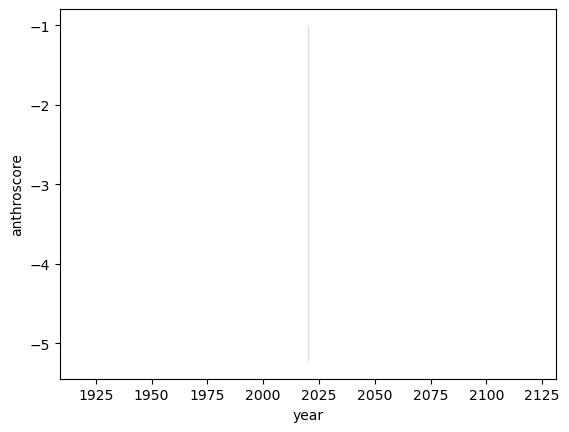

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.lineplot(x="year",y="anthroscore",data=english_topic9_articles)